## Initialization: Loading Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mp
import datetime as dt
%matplotlib inline

In [ ]:
df = pd.read_csv('prosperLoanData_1.csv')
df.shape

(113937, 83)

In [ ]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,8/26/2007,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2/27/2014,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,1/5/2007,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,10/22/2012,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,9/14/2013,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Map: Number of Applicants by State

In [ ]:
state_list = df['BorrowerState'].value_counts()
state_dict = dict(state_list)
borrow_locations = list(state_dict.keys())
borrow_z = list(state_dict.values())
print(state_dict)

{'CA': 14717, 'TX': 6842, 'NY': 6729, 'FL': 6720, 'IL': 5921, 'GA': 5008, 'OH': 4197, 'MI': 3593, 'VA': 3278, 'NJ': 3097, 'NC': 3084, 'WA': 3048, 'PA': 2972, 'MD': 2821, 'MO': 2615, 'MN': 2318, 'MA': 2242, 'CO': 2210, 'IN': 2078, 'AZ': 1901, 'WI': 1842, 'OR': 1817, 'TN': 1737, 'AL': 1679, 'CT': 1627, 'SC': 1122, 'NV': 1090, 'KS': 1062, 'KY': 983, 'OK': 971, 'LA': 954, 'UT': 877, 'AR': 855, 'MS': 787, 'NE': 674, 'ID': 599, 'NH': 551, 'NM': 472, 'RI': 435, 'HI': 409, 'WV': 391, 'DC': 382, 'MT': 330, 'DE': 300, 'VT': 207, 'AK': 200, 'SD': 189, 'IA': 186, 'WY': 150, 'ME': 101, 'ND': 52}


In [ ]:
data = Data([
    Choropleth(
        z= borrow_z,
        autocolorscale=False,
        colorbar=ColorBar(
        title='Appliers'),
        colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
        hoverinfo='location z',
        locationmode='USA-states',
        locations=borrow_locations,
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=borrow_locations
    )
])

layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='Borrower Locations'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

## Bar: Income Ranges

In [ ]:
plt.rcParams['figure.figsize'] = 10, 5 # Set Plot Size

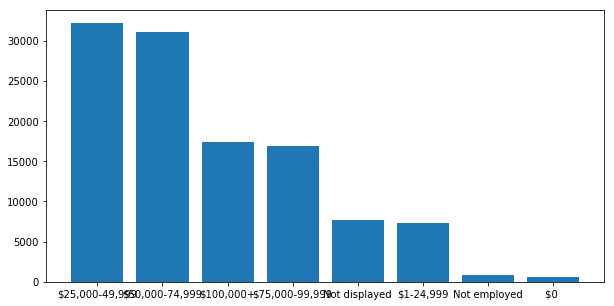

In [ ]:
v_dict_income_range = dict(df['IncomeRange'].value_counts())
plt.bar(range(8),list(v_dict_income_range.values()),tick_label=list(v_dict_income_range.keys()))
plt.show()

## Map: Mean APR by State

In [ ]:
v_apr_mean_by_state = dict(df.groupby('BorrowerState')['BorrowerAPR'].mean())
v_apr_mean_by_state_locations = list(v_apr_mean_by_state.keys())
v_apr_mean_by_state_z = list(v_apr_mean_by_state.values())

In [ ]:
data = Data([
    Choropleth(
        z= v_apr_mean_by_state_z,
        autocolorscale=False,
        colorbar=ColorBar(
        title='Rate'),
        colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
        hoverinfo='location z',
        locationmode='USA-states',
        locations=v_apr_mean_by_state_locations,
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=v_apr_mean_by_state_locations
    )
])

layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='Average APR by State'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

## Map: Debt to Income Ratio by State

In [ ]:
v_dtoi_by_state = dict(df.groupby('BorrowerState')['DebtToIncomeRatio'].mean())
v_dtoi_by_state_locations = list(v_dtoi_by_state.keys())
v_dtoi_by_state_z = list(v_dtoi_by_state.values())


In [ ]:
data = Data([
    Choropleth(
        z= v_dtoi_by_state_z,
        autocolorscale=False,
        colorbar=ColorBar(
        title='Rate'),
        colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
        hoverinfo='location z',
        locationmode='USA-states',
        locations=v_dtoi_by_state_locations,
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=v_dtoi_by_state_locations
    )
])

layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='Debt to Income Rate by State'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

## Map: Grade Level by State

In [ ]:
v_gradescores_by_state = dict(df.groupby('BorrowerState')['GradeScores'].mean())
v_gradescores_by_state_locations = list(v_gradescores_by_state.keys())
v_gradescores_by_state_z = list(v_gradescores_by_state.values())

In [ ]:
data = Data([
    Choropleth(
        z= v_gradescores_by_state_z,
        autocolorscale=False,
        colorbar=ColorBar(
        title='0-7'),
        colorscale=[[0, 'rgb(227,26,28)'], [0.25, 'rgb(251,154,153)'], [0.45, 'rgb(51,160,44)'], [0.65, 'rgb(178,223,138)'], [0.85, 'rgb(31,120,180)'], [1, 'rgb(166,206,227)']],
        hoverinfo='location z',
        locationmode='USA-states',
        locations=v_gradescores_by_state_locations,
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=v_gradescores_by_state_locations
    )
])

layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='Grade Score by State'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

## Map: Amount by State

In [ ]:
v_LoanOriginalAmount_by_state = dict(df.groupby('BorrowerState')['LoanOriginalAmount'].mean())
v_LoanOriginalAmount_by_state_locations = list(v_LoanOriginalAmount_by_state.keys())
v_LoanOriginalAmount_by_state_z = list(v_LoanOriginalAmount_by_state.values())

data = Data([
    Choropleth(
        z= v_LoanOriginalAmount_by_state_z,
        autocolorscale=False,
        colorbar=ColorBar(
        title='0-7'),
        colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
        hoverinfo='location z',
        locationmode='USA-states',
        locations=v_LoanOriginalAmount_by_state_locations,
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=v_LoanOriginalAmount_by_state_locations
    )
])

layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='Average Loan Original Amount by State'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

In [ ]:
v_MonthlyLoanPayment_by_state = dict(df.groupby('BorrowerState')['MonthlyLoanPayment'].mean())
v_MonthlyLoanPayment_by_state_locations = list(v_MonthlyLoanPayment_by_state.keys())
v_MonthlyLoanPayment_by_state_z = list(v_MonthlyLoanPayment_by_state.values())

data = Data([
    Choropleth(
        z= v_MonthlyLoanPayment_by_state_z,
        autocolorscale=False,
        colorbar=ColorBar(
        title='0-7'),
        colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
        hoverinfo='location z',
        locationmode='USA-states',
        locations=v_MonthlyLoanPayment_by_state_locations,
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=v_MonthlyLoanPayment_by_state_locations
    )
])

layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='Average Monthly Loan Payment by State'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

## Map: Employment Status Duration by State

In [ ]:
v_EmploymentStatusDuration_by_state = dict(df.groupby('BorrowerState')['EmploymentStatusDuration'].mean())
v_EmploymentStatusDuration_by_state_locations = list(v_EmploymentStatusDuration_by_state.keys())
v_EmploymentStatusDuration_by_state_z = list(v_EmploymentStatusDuration_by_state.values())

data = Data([
    Choropleth(
        z= v_EmploymentStatusDuration_by_state_z,
        autocolorscale=False,
        colorbar=ColorBar(
        title='months'),
        colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
        hoverinfo='location z',
        locationmode='USA-states',
        locations=v_EmploymentStatusDuration_by_state_locations,
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=v_EmploymentStatusDuration_by_state_locations
    )
])

layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='Average Employment Status Duration (months) by State'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

## Percentage of Default in Each State

#### Get Number of Each Status by State


In [ ]:
v_defaulted_by_state = df.groupby(['BorrowerState', 'LoanStatus']).size().unstack()
v_defaulted_by_state

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
BorrowerState,,,,,,,,,,,,
AK,NaN,15.0,75.0,103.0,3.0,2.0,1.0,NaN,NaN,1.0,NaN,NaN
AL,NaN,237.0,489.0,794.0,122.0,2.0,11.0,5.0,10.0,6.0,3.0,NaN
AR,NaN,64.0,203.0,557.0,12.0,NaN,7.0,2.0,4.0,1.0,5.0,NaN
AZ,NaN,235.0,617.0,924.0,94.0,4.0,10.0,3.0,6.0,6.0,2.0,NaN
CA,NaN,1574.0,4957.0,7209.0,732.0,38.0,84.0,20.0,43.0,33.0,27.0,NaN
CO,NaN,159.0,781.0,1157.0,73.0,4.0,16.0,5.0,10.0,2.0,3.0,NaN
CT,NaN,116.0,424.0,1018.0,29.0,6.0,8.0,5.0,7.0,8.0,4.0,2.0
DC,NaN,23.0,145.0,196.0,6.0,2.0,6.0,1.0,NaN,2.0,1.0,NaN
DE,NaN,24.0,72.0,190.0,7.0,2.0,4.0,NaN,1.0,NaN,NaN,NaN


#### Convert to Percentage

In [ ]:
v_defaulted_by_state1 = df.groupby('BorrowerState')['LoanStatus'].value_counts()
v_defaulted_by_state1

state_pcts = v_defaulted_by_state1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
state_pcts_usk = state_pcts.unstack()
state_pcts_usk

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
BorrowerState,,,,,,,,,,,,
AK,NaN,7.500000,37.500000,51.500000,1.500000,1.000000,0.500000,NaN,NaN,0.500000,NaN,NaN
AL,NaN,14.115545,29.124479,47.290054,7.266230,0.119119,0.655152,0.297796,0.595593,0.357356,0.178678,NaN
AR,NaN,7.485380,23.742690,65.146199,1.403509,NaN,0.818713,0.233918,0.467836,0.116959,0.584795,NaN
AZ,NaN,12.361915,32.456602,48.605997,4.944766,0.210416,0.526039,0.157812,0.315623,0.315623,0.105208,NaN
CA,NaN,10.695114,33.682136,48.984168,4.973840,0.258205,0.570768,0.135897,0.292179,0.224230,0.183461,NaN
CO,NaN,7.194570,35.339367,52.352941,3.303167,0.180995,0.723982,0.226244,0.452489,0.090498,0.135747,NaN
CT,NaN,7.129687,26.060234,62.569146,1.782422,0.368777,0.491703,0.307314,0.430240,0.491703,0.245851,0.122926
DC,NaN,6.020942,37.958115,51.308901,1.570681,0.523560,1.570681,0.261780,NaN,0.523560,0.261780,NaN
DE,NaN,8.000000,24.000000,63.333333,2.333333,0.666667,1.333333,NaN,0.333333,NaN,NaN,NaN


In [ ]:
default_by_state = state_pcts_usk['Defaulted']

### Map: Default Percentage by State

In [ ]:
v_default_by_state_by_state = dict(default_by_state)
v_default_by_state_by_state_locations = list(v_default_by_state_by_state.keys())
v_default_by_state_by_state_z = list(v_default_by_state_by_state.values())

data = Data([
    Choropleth(
        z= v_default_by_state_by_state_z,
        autocolorscale=False,
        colorbar=ColorBar(
        title='%'),
        colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
        hoverinfo='location z',
        locationmode='USA-states',
        locations=v_default_by_state_by_state_locations,
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=v_default_by_state_by_state_locations
    )
])

layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='Default Percentage by State'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

### Default Percentage by Occupation

In [ ]:
default_by_occu = df.groupby('Occupation')['LoanStatus'].value_counts()
default_by_occu

default_by_occu_pcts = default_by_occu.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
default_by_occu_pcts_usk = default_by_occu_pcts.unstack()
default_by_occu_pcts_usk

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
Occupation,,,,,,,,,,,,
Accountant/CPA,NaN,7.732756,35.694401,51.809465,2.876585,0.185586,0.711414,0.309310,0.247448,0.216517,0.216517,NaN
Administrative Assistant,0.027115,12.472885,34.083514,45.309111,5.856833,0.108460,0.921909,0.216920,0.216920,0.379610,0.406725,NaN
Analyst,NaN,6.274292,40.283176,48.806219,2.776235,0.194336,0.583009,0.194336,0.277624,0.305386,0.277624,0.027762
Architect,NaN,8.920188,44.131455,42.253521,3.286385,0.469484,0.938967,NaN,NaN,NaN,NaN,NaN
Attorney,NaN,3.441683,36.711281,57.648184,1.242830,0.095602,0.095602,0.286807,0.286807,0.095602,0.095602,NaN
Biologist,NaN,10.400000,41.600000,45.600000,NaN,NaN,2.400000,NaN,NaN,NaN,NaN,NaN
Bus Driver,NaN,12.341772,24.367089,56.329114,4.113924,0.316456,1.265823,0.316456,0.632911,0.316456,NaN,NaN
Car Dealer,NaN,8.888889,29.444444,52.222222,5.000000,NaN,1.111111,2.222222,0.555556,NaN,0.555556,NaN
Chemist,NaN,10.344828,35.862069,49.655172,2.758621,0.689655,NaN,NaN,NaN,NaN,0.689655,NaN


In [ ]:
# Top 10 Most Likely to Default
default_by_occu_pcts_usk1 = default_by_occu_pcts_usk['Defaulted']
default_by_occu_10l = default_by_occu_pcts_usk1.nlargest(10)
print(default_by_occu_10l)


Occupation
Student - Technical School     18.750000
Student - Community College    14.285714
Student - College Sophomore    13.043478
Realtor                        10.497238
Clerical                        8.470291
Homemaker                       8.333333
Student - College Freshman      7.317073
Student - College Junior        7.142857
Tradesman - Plumber             6.862745
Nurse's Aide                    6.720978
Name: Defaulted, dtype: float64


In [ ]:
# Top 10 Least Likely to Default
default_by_occu_10s = default_by_occu_pcts_usk1.nsmallest(10)
default_by_occu_pcts_usk1.nsmallest(10)

Occupation
Pilot - Private/Commercial    1.005025
Military Officer              1.156069
Attorney                      1.242830
Scientist                     1.344086
Psychologist                  1.379310
Religious                     1.612903
Landscaping                   1.694915
Engineer - Electrical         1.866667
Investor                      1.869159
Student - College Senior      2.127660
Name: Defaulted, dtype: float64

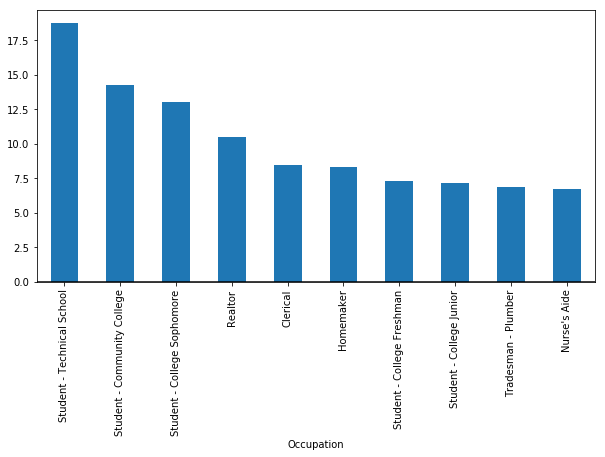

In [ ]:
# Top 10 Most Likely to Default
plt.figure();
default_by_occu_10l.plot.bar();
plt.axhline(0, color='k')

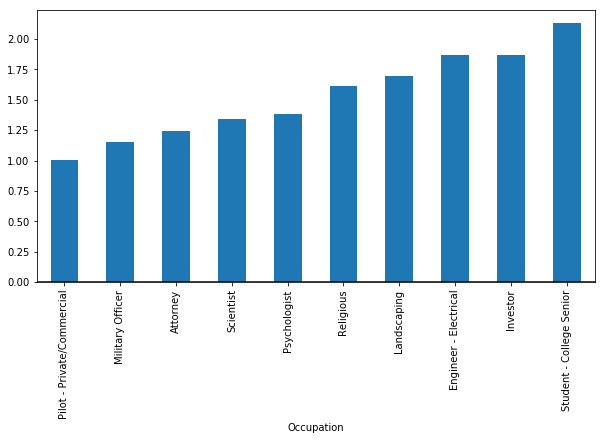

In [ ]:
# Top 10 Least Likely to Default
plt.figure();
default_by_occu_10s.plot.bar();
plt.axhline(0, color='k')

### Grades vs Occupation/Loan Status/Employment Status

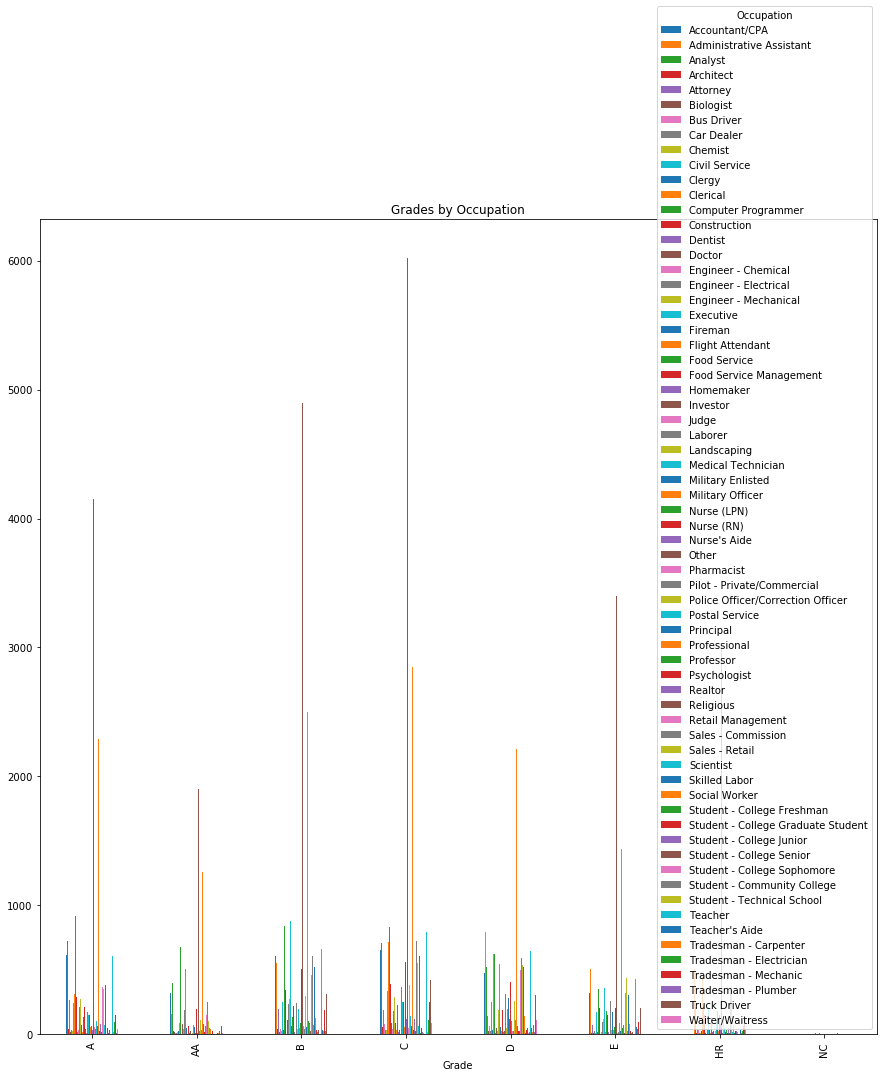

In [ ]:
occu_grade = df.groupby(['Grade','Occupation'])
occu_grade.size().unstack().plot(kind='bar',title="Grades by Occupation",figsize=(15,15))

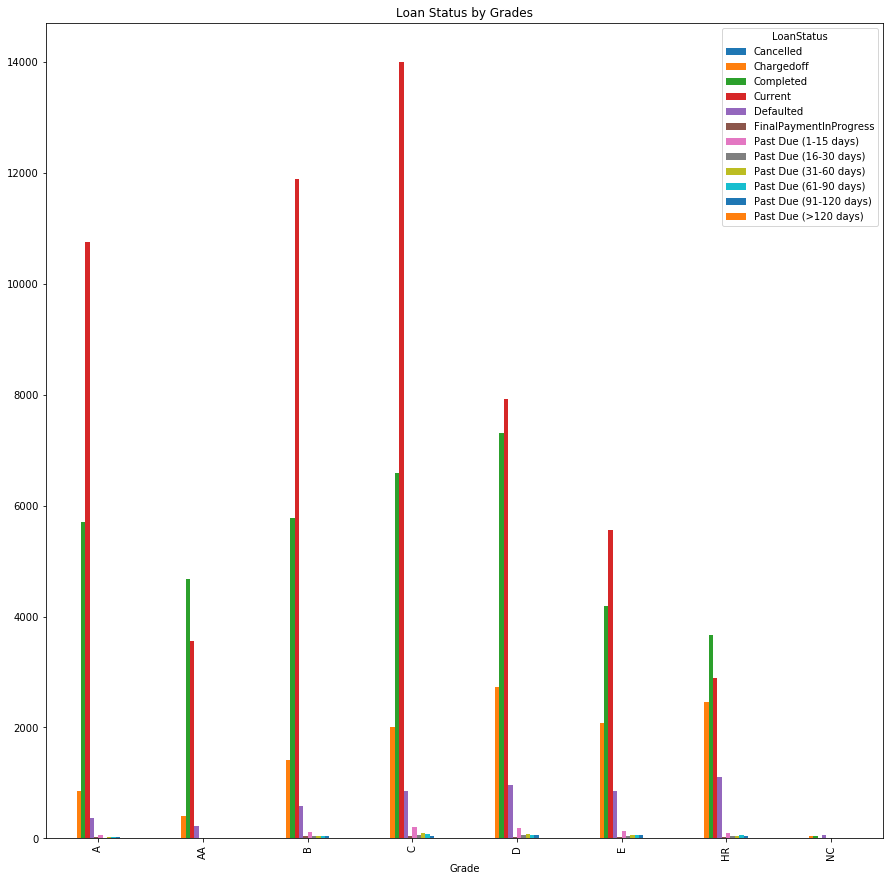

In [ ]:
status_grade = df.groupby(['Grade','LoanStatus'])
status_grade.size().unstack().plot(kind='bar',title="Loan Status by Grades",figsize=(15,15))

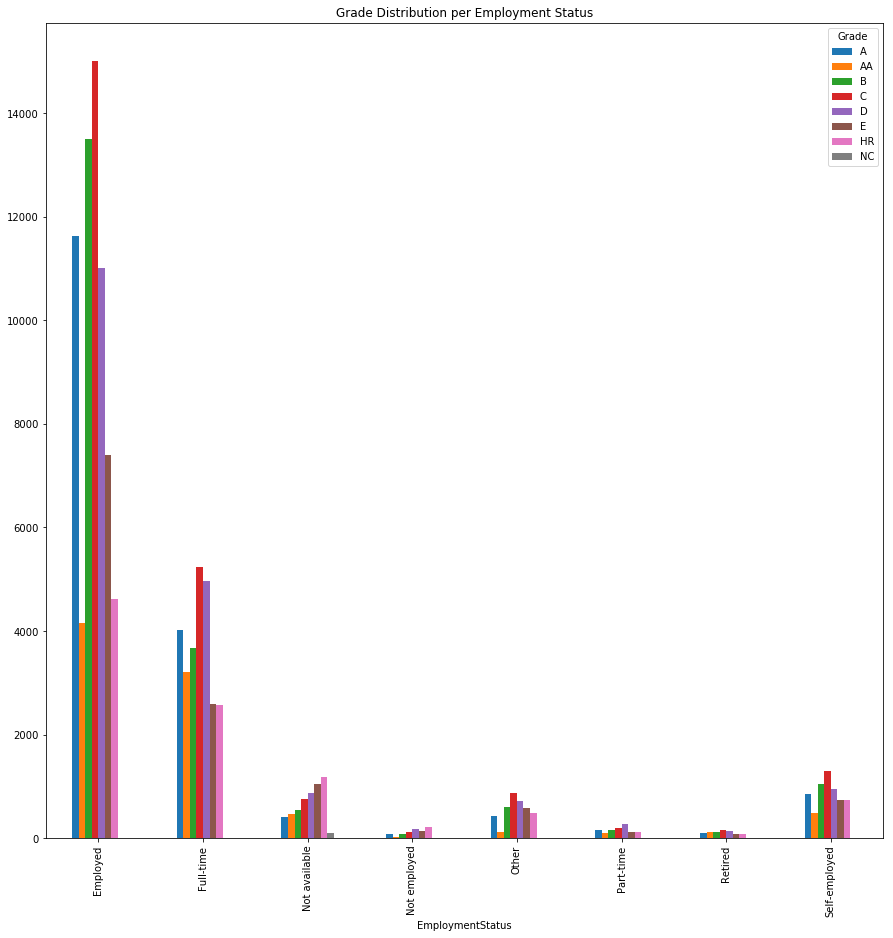

In [ ]:
EmploymentStatus_grade = df.groupby(['EmploymentStatus','Grade'])
EmploymentStatus_grade.size().unstack().plot(kind='bar',title="Grade Distribution per Employment Status",figsize=(15,15))

### Distribution of Credit Score Range(Lower End)

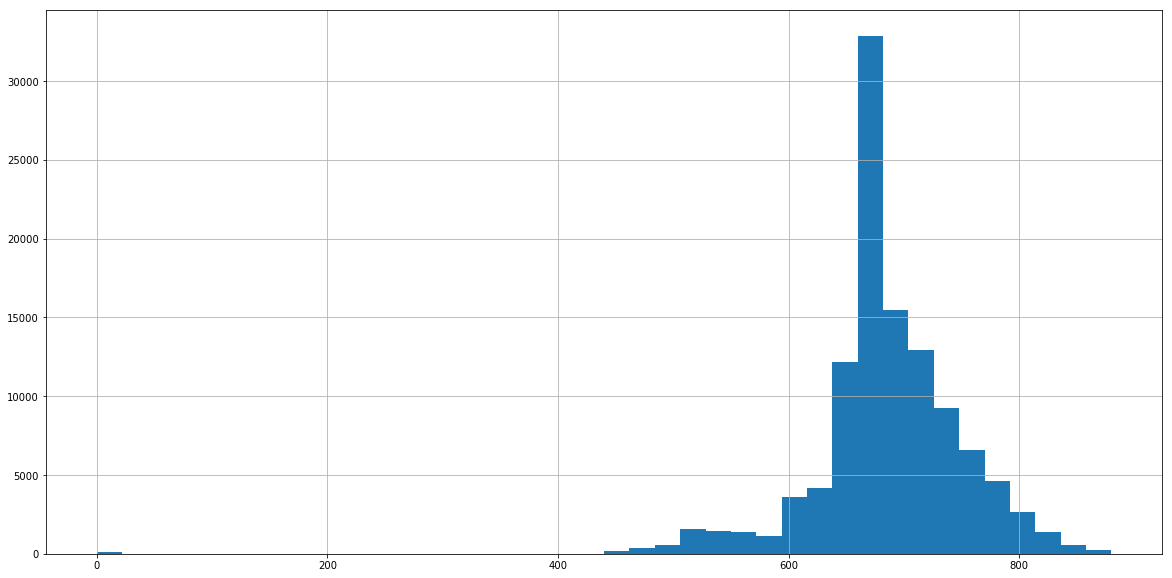

In [ ]:
df['CreditScoreRangeLower'].hist(bins=40)

## Time Series Analysis

In [ ]:
ts = df[['ListingCreationDate','LoanOriginalAmount']]


In [ ]:
ts['Date'] = pd.to_datetime(ts['ListingCreationDate'],format='%m/%d/%Y', errors='coerce')
ts['Year'] = ts['Date'].apply(lambda x: x.year)

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
ts.head()

,ListingCreationDate,LoanOriginalAmount,Date,Year
0,8/26/2007,9425,2007-08-26,2007
1,2/27/2014,10000,2014-02-27,2014
2,1/5/2007,3001,2007-01-05,2007
3,10/22/2012,10000,2012-10-22,2012
4,9/14/2013,15000,2013-09-14,2013


### Plot: Loan Amount vs Year

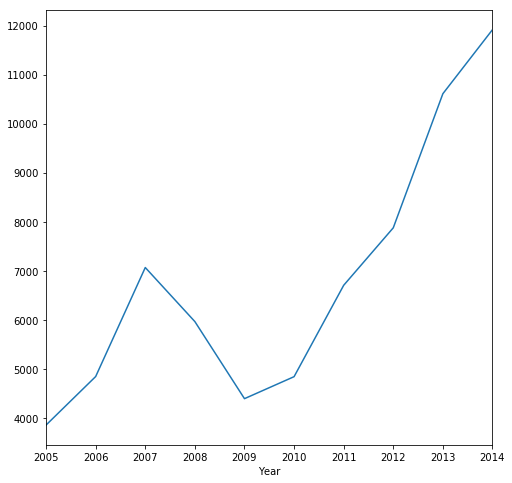

In [ ]:
# Per Year
import matplotlib.pyplot as plt
plot,axes = plt.subplots(figsize = (8,8))
ts.groupby(['Year'])['LoanOriginalAmount'].mean().plot(ax=axes)
plt.show()

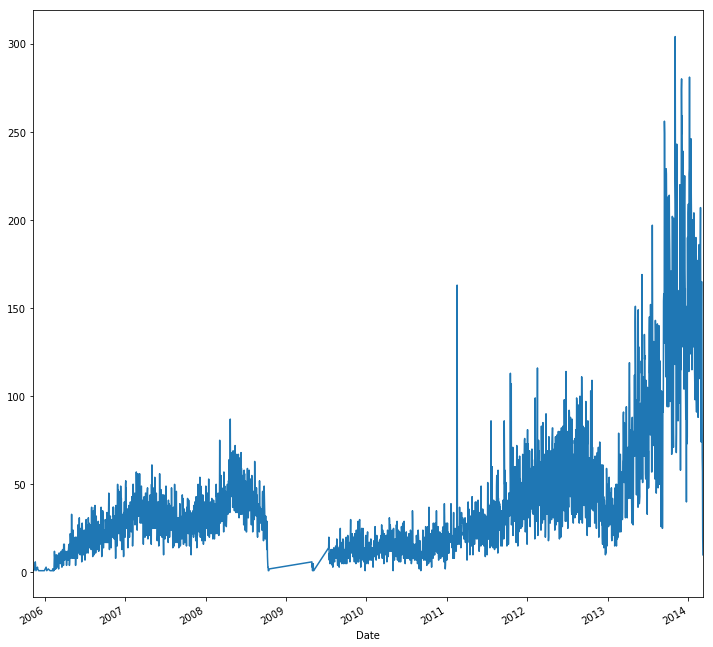

In [ ]:
# Per Day
import matplotlib.pyplot as plt
plot,axes = plt.subplots(figsize = (12,12))
ts.groupby(['Date'])['LoanOriginalAmount'].size().plot(ax=axes)
plt.show()

### Plot: Number of Applicants vs Year

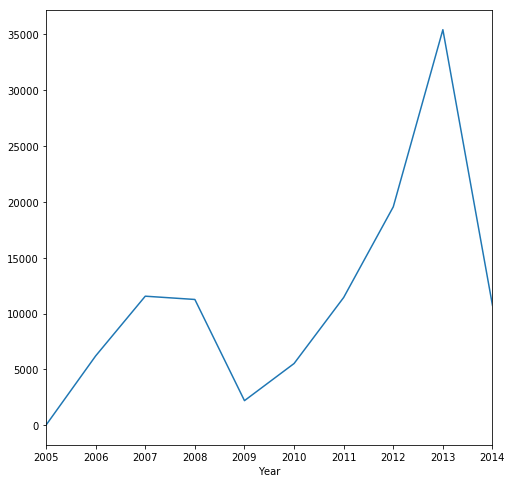

In [ ]:
import matplotlib.pyplot as plt
plot,axes = plt.subplots(figsize = (8,8))
ts.groupby(['Year'])['LoanOriginalAmount'].size().plot(ax=axes)
plt.show()